In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
%matplotlib inline

In [158]:
data=pd.read_csv('train.csv')

In [159]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
len(data)

891

In [161]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
features=data[['Pclass','Sex','SibSp','Parch','Fare','Embarked','Survived']]
features=features.dropna(axis=0)
features.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived
0,3,male,1,0,7.2500,S,0
1,1,female,1,0,71.2833,C,1
2,3,female,0,0,7.9250,S,1
3,1,female,1,0,53.1000,S,1
4,3,male,0,0,8.0500,S,0


In [57]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [58]:
#x_train=np.array(features.drop(['Survived'],axis=1)).copy()
#y_train=np.array(features['Survived']).reshape(1,len(y_train))
#print(x_train.shape,'',y_train.shape)

# Play Time              

In [59]:
li=list(set(features['Sex']))
print(li)
features['Sex']=features['Sex'].replace(li,[0,1])

['female', 'male']


In [60]:
li=list(set(features['Embarked']))
print(li)
features['Embarked']=features['Embarked'].replace(li,[0,1,2])

['C', 'Q', 'S']


In [163]:
features=features/features.max()
print(features.head(10))
print(len(features))

     Pclass  Sex  SibSp     Parch      Fare  Embarked  Survived
0  1.000000  1.0  0.125  0.000000  0.014151       1.0       0.0
1  0.333333  0.0  0.125  0.000000  0.139136       0.0       1.0
2  1.000000  0.0  0.000  0.000000  0.015469       1.0       1.0
3  0.333333  0.0  0.125  0.000000  0.103644       1.0       1.0
4  1.000000  1.0  0.000  0.000000  0.015713       1.0       0.0
5  1.000000  1.0  0.000  0.000000  0.016510       0.5       0.0
6  0.333333  1.0  0.000  0.000000  0.101229       1.0       0.0
7  1.000000  1.0  0.375  0.166667  0.041136       1.0       0.0
8  1.000000  0.0  0.000  0.333333  0.021731       1.0       1.0
9  0.666667  0.0  0.125  0.000000  0.058694       0.0       1.0
889


In [164]:
x_train=np.array(features.drop(['Survived'],axis=1)).copy()
y_train=np.array(features['Survived']).reshape(1,len(features['Survived']))
print(x_train.shape,'',y_train.shape)


(889, 6)  (1, 889)


(889, 6)


In [174]:
def sigmoid(m,x,c):
    return 1/(1+np.exp(-(np.dot(m,x.T)+c)))

m=np.random.randn(1,6)
c=random.random()
#print(sigmoid(m,x_train,c).shape)
def error(predicted,actual):
    return np.mean((predicted-actual)**2)
    
def der_slope(m,x,c,y):
    a=np.exp(-np.dot(m,x.T)+c)#e^-x shape is 1,889
    b=sigmoid(m,x,c)**2#(1/1+e^-x)**2 shape is 1, 889
    c=sigmoid(m,x,c)-y#shape 1,889
    d= 2*np.mean(np.multiply(c,np.multiply(b,np.multiply(c,x.T))),axis=1)
    d=np.array(d).reshape(1,6)
    print(a.shape," ",b.shape," ",c.shape," ",d.shape)
    return d

def inter(m,x,c,y):
    a=np.exp(-np.dot(m,x.T)+c)#e^-x shape is 1,889
    b=sigmoid(m,x,c)**2#(1/1+e^-x)**2 shape is 1, 889
    c=sigmoid(m,x,c)-y#shape 1,889
    d=2*np.mean(a*b*c)
    return d

def accuracy(m,x,c,y):
    y_predicted=sigmoid(m,x,c)
    #print(y_predicted.shape," ",y.shape)
    y_predicted[y_predicted>=0.5]=1
    y_predicted[y_predicted<0.5]=0
    correct=len(y_predicted[y_predicted==y])
    #print(correct," ",len(y.T))
    return correct/len(y.T)*100

print(der_slope(m,x_train,c,y_train).shape)

(1, 889)   (1, 889)   (1, 889)   (1, 6)
(1, 6)


In [181]:
#now lets check out our good work
m=np.random.randn(1,6)#randomly initialize value of m with the help of normal distribution
c=random.random()#take any random number as c
alpha=2#learning rate
cost=[]
for i in range(0,100):
    cost.append(error(sigmoid(m,x_train,c),y_train))#append current error in cost, just to plot and visualize it
    m=m-alpha*(der_slope(m,x_train,c,y_train))#m=m-learning_rate*d(error)/d(m)
    c=c-alpha*inter(m,x_train,c,y_train)#c=c-learning_rate*d(error)/d(c)
    #clear_output(True)#just to remove the previous printed output from the display
    print(i,'  Current error-->',error(sigmoid(m,x_train,c),y_train),"  ",'Current Accuracy--->', accuracy(m,x_train,c,y_train))

(1, 889)   (1, 889)   (1, 889)   (1, 6)
0   Current error--> 0.1772669129640922    Current Accuracy---> 77.50281214848144
(1, 889)   (1, 889)   (1, 889)   (1, 6)
1   Current error--> 0.17363560603312286    Current Accuracy---> 77.61529808773903
(1, 889)   (1, 889)   (1, 889)   (1, 6)
2   Current error--> 0.1704021216406507    Current Accuracy---> 77.61529808773903
(1, 889)   (1, 889)   (1, 889)   (1, 6)
3   Current error--> 0.16754033292511183    Current Accuracy---> 79.52755905511812
(1, 889)   (1, 889)   (1, 889)   (1, 6)
4   Current error--> 0.16536208865477814    Current Accuracy---> 80.53993250843644
(1, 889)   (1, 889)   (1, 889)   (1, 6)
5   Current error--> 0.16287540231366301    Current Accuracy---> 80.53993250843644
(1, 889)   (1, 889)   (1, 889)   (1, 6)
6   Current error--> 0.16103043321134902    Current Accuracy---> 80.08998875140607
(1, 889)   (1, 889)   (1, 889)   (1, 6)
7   Current error--> 0.15827160822322692    Current Accuracy---> 79.97750281214849
(1, 889)   (1, 889

Text(0.5,1,'alpha=0.001')

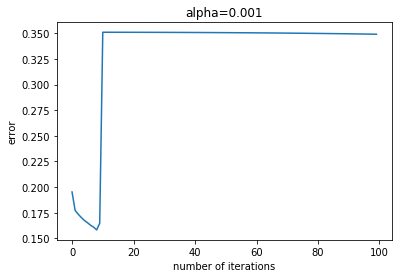

In [182]:
plt.plot(cost)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("alpha=0.001")

#  Now we are going to analyse this with MLE cost function

In [183]:
def cost(y_pre,y):
    #print(x[0].shape)
    y_pred=[]
    for i in range(len(y.T)):
        if(y[0][i]==1):
            y_pred.append(-np.log(y_pre[0][i]))
            #print(y[0][i]," ",y_pre[0][i])
                          
        else:
            #print(y_pre[0][i])
            y_pred.append(-np.log(1-y_pre[0][i]))
            
    res=np.mean(y_pred)
    #print(np.array(y_pred).shape)
    return res

def der(m,x,c,y):
    return np.array(np.mean((sigmoid(m,x,c)-y)*x.T, axis=1)).reshape(1,6)
print(der(m,x_train,c,y_train))
         
def inte(m,x,c,y):
    return np.mean(sigmoid(m,x,c)-y)
print(inte(m,x_train,c,y_train))
print(cost(sigmoid(m,x_train,c),y_train))

[[-0.2358715  -0.11654879 -0.02150708 -0.02834368 -0.03275505 -0.24661853]]
-0.3582065792696788
1.3525091237778049


In [188]:
#now lets check out our good work
m=np.random.randn(1,6)#randomly initialize value of m with the help of normal distribution
c=random.random()#take any random number as c
alpha=5#learning rate
cost1=[]
for i in range(0,1000):
    cost1.append(cost(sigmoid(m,x_train,c),y_train))#append current error in cost, just to plot and visualize it
    m=m-alpha*(der(m,x_train,c,y_train))#m=m-learning_rate*d(error)/d(m)
    c=c-alpha*inte(m,x_train,c,y_train)#c=c-learning_rate*d(error)/d(c)
    #clear_output(True)#just to remove the previous printed output from the display
    print(i,'  Current error-->',cost(sigmoid(m,x_train,c),y_train),"  ",'Current Accuracy--->', accuracy(m,x_train,c,y_train))

0   Current error--> 0.5435392208745071    Current Accuracy---> 71.9910011248594
1   Current error--> 0.5129952897562294    Current Accuracy---> 78.29021372328458
2   Current error--> 0.4945674714077025    Current Accuracy---> 80.42744656917885
3   Current error--> 0.4839976174851035    Current Accuracy---> 79.86501687289089
4   Current error--> 0.4775587436734266    Current Accuracy---> 79.07761529808775
5   Current error--> 0.4734431083589533    Current Accuracy---> 78.96512935883014
6   Current error--> 0.47068957317084553    Current Accuracy---> 78.74015748031496
7   Current error--> 0.4687646978768229    Current Accuracy---> 78.62767154105737
8   Current error--> 0.46736096815656786    Current Accuracy---> 78.62767154105737
9   Current error--> 0.4662955446309261    Current Accuracy---> 78.62767154105737
10   Current error--> 0.4654567847485025    Current Accuracy---> 78.62767154105737
11   Current error--> 0.4647748565669542    Current Accuracy---> 78.62767154105737
12   Current 

134   Current error--> 0.4572882342994958    Current Accuracy---> 79.07761529808775
135   Current error--> 0.45728166637428636    Current Accuracy---> 79.07761529808775
136   Current error--> 0.4572751974412418    Current Accuracy---> 79.07761529808775
137   Current error--> 0.4572688255239772    Current Accuracy---> 79.07761529808775
138   Current error--> 0.45726254869738303    Current Accuracy---> 79.07761529808775
139   Current error--> 0.45725636508597683    Current Accuracy---> 79.07761529808775
140   Current error--> 0.45725027286231723    Current Accuracy---> 79.07761529808775
141   Current error--> 0.45724427024548    Current Accuracy---> 79.07761529808775
142   Current error--> 0.45723835549959085    Current Accuracy---> 79.07761529808775
143   Current error--> 0.4572325269324148    Current Accuracy---> 79.07761529808775
144   Current error--> 0.45722678289399693    Current Accuracy---> 79.07761529808775
145   Current error--> 0.4572211217753548    Current Accuracy---> 79.077

336   Current error--> 0.4568081070729595    Current Accuracy---> 79.30258717660293
337   Current error--> 0.4568074343734856    Current Accuracy---> 79.30258717660293
338   Current error--> 0.456806767803814    Current Accuracy---> 79.30258717660293
339   Current error--> 0.45680610729996457    Current Accuracy---> 79.30258717660293
340   Current error--> 0.4568054527987332    Current Accuracy---> 79.30258717660293
341   Current error--> 0.4568048042376813    Current Accuracy---> 79.30258717660293
342   Current error--> 0.45680416155512527    Current Accuracy---> 79.30258717660293
343   Current error--> 0.4568035246901254    Current Accuracy---> 79.30258717660293
344   Current error--> 0.456802893582476    Current Accuracy---> 79.30258717660293
345   Current error--> 0.45680226817269504    Current Accuracy---> 79.30258717660293
346   Current error--> 0.45680164840201387    Current Accuracy---> 79.30258717660293
347   Current error--> 0.4568010342123678    Current Accuracy---> 79.30258

440   Current error--> 0.45676210589020616    Current Accuracy---> 79.30258717660293
441   Current error--> 0.4567618316413577    Current Accuracy---> 79.30258717660293
442   Current error--> 0.45676155962899284    Current Accuracy---> 79.30258717660293
443   Current error--> 0.45676128983306324    Current Accuracy---> 79.30258717660293
444   Current error--> 0.45676102223372417    Current Accuracy---> 79.30258717660293
445   Current error--> 0.4567607568113325    Current Accuracy---> 79.30258717660293
446   Current error--> 0.45676049354644443    Current Accuracy---> 79.30258717660293
447   Current error--> 0.4567602324198127    Current Accuracy---> 79.30258717660293
448   Current error--> 0.45675997341238467    Current Accuracy---> 79.30258717660293
449   Current error--> 0.45675971650530006    Current Accuracy---> 79.30258717660293
450   Current error--> 0.45675946167988846    Current Accuracy---> 79.30258717660293
451   Current error--> 0.4567592089176674    Current Accuracy---> 79

549   Current error--> 0.45674207626097363    Current Accuracy---> 79.30258717660293
550   Current error--> 0.4567419602634452    Current Accuracy---> 79.30258717660293
551   Current error--> 0.45674184515052174    Current Accuracy---> 79.30258717660293
552   Current error--> 0.4567417309150698    Current Accuracy---> 79.30258717660293
553   Current error--> 0.4567416175500191    Current Accuracy---> 79.30258717660293
554   Current error--> 0.45674150504836075    Current Accuracy---> 79.30258717660293
555   Current error--> 0.45674139340314807    Current Accuracy---> 79.30258717660293
556   Current error--> 0.45674128260749497    Current Accuracy---> 79.30258717660293
557   Current error--> 0.4567411726545757    Current Accuracy---> 79.30258717660293
558   Current error--> 0.4567410635376243    Current Accuracy---> 79.30258717660293
559   Current error--> 0.4567409552499335    Current Accuracy---> 79.30258717660293
560   Current error--> 0.4567408477848554    Current Accuracy---> 79.30

679   Current error--> 0.45673243100873573    Current Accuracy---> 79.30258717660293
680   Current error--> 0.45673238717289055    Current Accuracy---> 79.30258717660293
681   Current error--> 0.456732343658238    Current Accuracy---> 79.30258717660293
682   Current error--> 0.45673230046236013    Current Accuracy---> 79.30258717660293
683   Current error--> 0.45673225758285785    Current Accuracy---> 79.30258717660293
684   Current error--> 0.45673221501735134    Current Accuracy---> 79.30258717660293
685   Current error--> 0.45673217276347894    Current Accuracy---> 79.30258717660293
686   Current error--> 0.4567321308188979    Current Accuracy---> 79.41507311586051
687   Current error--> 0.4567320891812841    Current Accuracy---> 79.41507311586051
688   Current error--> 0.4567320478483313    Current Accuracy---> 79.41507311586051
689   Current error--> 0.45673200681775156    Current Accuracy---> 79.41507311586051
690   Current error--> 0.45673196608727484    Current Accuracy---> 79.

788   Current error--> 0.4567291256142984    Current Accuracy---> 79.30258717660293
789   Current error--> 0.4567291058074165    Current Accuracy---> 79.30258717660293
790   Current error--> 0.4567290861433034    Current Accuracy---> 79.30258717660293
791   Current error--> 0.4567290666209145    Current Accuracy---> 79.30258717660293
792   Current error--> 0.4567290472392134    Current Accuracy---> 79.30258717660293
793   Current error--> 0.4567290279971714    Current Accuracy---> 79.30258717660293
794   Current error--> 0.4567290088937671    Current Accuracy---> 79.30258717660293
795   Current error--> 0.45672898992798733    Current Accuracy---> 79.30258717660293
796   Current error--> 0.45672897109882604    Current Accuracy---> 79.30258717660293
797   Current error--> 0.45672895240528505    Current Accuracy---> 79.30258717660293
798   Current error--> 0.45672893384637353    Current Accuracy---> 79.30258717660293
799   Current error--> 0.45672891542110805    Current Accuracy---> 79.30

Text(0.5,1,'alpha=19')

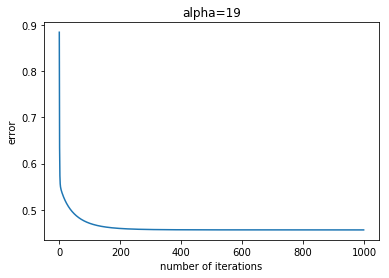

In [185]:
plt.plot(cost1)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("alpha=1")